In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import find_contours, label, regionprops


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([  0., 255.], dtype=float32)

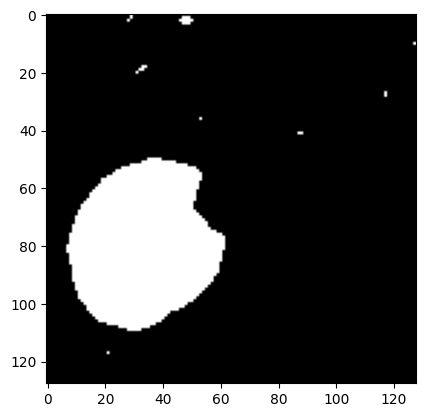

In [16]:
# img = cv2.imread('/home/workspace/AMP_mysef_2D_Cls/de.png')
img = cv2.imread('/home/workspace/AMP_mysef_2D_Cls/ipynb/de.png')
# img = img.astype(np.float32) / 255
# cv2.imwrite('de.png', img)
img = img.astype(np.float32) * 255
plt.imshow(img)
np.unique(img)

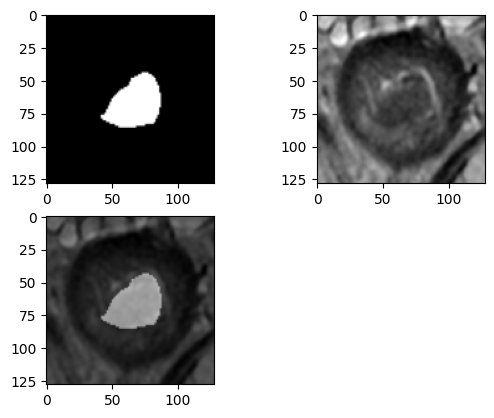

In [19]:
img_path = f''
# image_path = f'/home/workspace/AMP_mysef_2D_Cls/data/png_img_Tr_nonzero/crc_054/crc_054_013.png'
# mask_path = f'/home/workspace/AMP_mysef_2D_Cls/data/png_mask_Tr_nonzero/crc_054/crc_054_013.png'

image_path = '/home/workspace/AMP_mysef_2D_Cls/img.png'
mask_path = '/home/workspace/AMP_mysef_2D_Cls/mask.png'

image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

plt.subplot(221)
plt.imshow(mask, cmap='gray')

plt.subplot(222)
plt.imshow(image/255, cmap='gray')

plt.subplot(223)
plt.imshow(image, cmap='gray')
plt.imshow(mask, alpha=0.5, cmap='gray')

# np.unique(mask)
# np.unique(image/255)

In [2]:
def mask_to_border(mask):
    h, w = mask.shape
    border = np.zeros((h, w))

    contours = find_contours(mask, 128)
    for contour in contours:
        for c in contour:
            x = int(c[0])
            y = int(c[1])
            border[x][y] = 255

    return border

In [ ]:
border = mask_to_border(mask)

In [ ]:
plt.imshow(border)

In [3]:
""" Mask to bounding boxes """
def mask_to_bbox(mask):
    bboxes = []

    mask = mask_to_border(mask)
    lbl = label(mask)
    props = regionprops(lbl)
    for prop in props:
        x1 = prop.bbox[1]
        y1 = prop.bbox[0]

        x2 = prop.bbox[3]
        y2 = prop.bbox[2]

        bboxes.append([x1, y1, x2, y2])

    return bboxes

In [ ]:
bboxes = mask_to_bbox(mask)
bboxes

In [ ]:
# bboxes = mask_to_bbox(mask)
x1 = bboxes[0][0]
y1 = bboxes[0][1]
x2 = bboxes[0][2]
y2 = bboxes[0][3]

cX = (x2 + x1) // 2
cY = (y2 + y1) // 2
Center = (cX, cY)
Center
dis = 30

In [ ]:
# mask1 = cv2.rectangle(mask, (x1-20, y1-20), (x2+20, y2+20), (255, 0, 0), 1)
# mask1 = cv2.rectangle(mask, (x1, y1), (x2, y2), (255, 0, 0), 1)
# plt.imshow(mask1, cmap='gray')

In [ ]:
print(x1, x2, y1, y2)
# plt.imshow(mask1[x1:x2, y1:y2], cmap='gray')

# cv2.imshow('a', mask)
# k = cv2.waitKey(0)
# if k ==27:     # 键盘上Esc键的键值
#     cv2.destroyAllWindows() 

In [ ]:
crop_mask = cv2.imwrite('./demo_mask.png', mask[y1 - dis: y2 + dis, x1 - dis: x2 + dis])
crop_img = cv2.imwrite('./demo_img.png', image[y1 - dis: y2 + dis, x1 - dis: x2 + dis])

In [ ]:
plt.subplot(221)
plt.imshow(mask[y1 - dis: y2 + dis, x1 - dis: x2 + dis], cmap='gray')

plt.subplot(222)
plt.imshow(image[y1 - dis: y2 + dis, x1 - dis: x2 + dis], cmap='gray')

plt.subplot(223)
plt.imshow(mask[y1 - dis: y2 + dis, x1 - dis: x2 + dis], cmap='gray')
plt.imshow(image[y1 - dis: y2 + dis, x1 - dis: x2 + dis], alpha=0.5, cmap='gray')

In [ ]:
image_path = f'/home/workspace/AMP_mysef_2D_Cls/data/png_img_Tr_nonzero/crc_054/crc_054_013.png'
mask_path = f'/home/workspace/AMP_mysef_2D_Cls/data/png_mask_Tr_nonzero/crc_054/crc_054_013.png'

image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(mask, cmap='gray')

In [ ]:
# 

In [8]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
image_path = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/crop_demo/png_img_Ts_nonzero/'
mask_path = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/crop_demo/png_mask_Ts_nonzero/'

image_save = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/cropped_Ts/imgs/'
mask_save = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/cropped_Ts/masks/'


for img_dir in sorted(os.listdir(image_path)):
    # print(img_dir)
    for img_file, mask_file in zip(sorted(glob(os.path.join(image_path + img_dir + '/*.png'))), sorted(glob(os.path.join(mask_path + img_dir + '/*.png')))):
        # print(img_file, mask_file)
        img_name = img_file.split('/')[-1]
        mask_name = mask_file.split('/')[-1]

        # print(img_name)
        # print(mask_name)

        img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
        mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
        # print(img.shape)
        assert img.shape == mask.shape

        bboxes = mask_to_bbox(mask)
        x1 = bboxes[0][0]
        y1 = bboxes[0][1]
        x2 = bboxes[0][2]
        y2 = bboxes[0][3]

        cX = (x2 + x1) // 2
        cY = (y2 + y1) // 2
        Center = (cX, cY)
        Center
        dis = 30

        # print(Center)

        # continue
        path_mask_save = mask_save + img_dir + '/'
        os.makedirs(path_mask_save, exist_ok=True)
        crop_mask = cv2.imwrite(path_mask_save + f'/{mask_name}', mask[y1 - dis: y2 + dis, x1 - dis: x2 + dis])

        path_img_save = image_save + img_dir + '/'
        os.makedirs(path_img_save, exist_ok=True)
        crop_img = cv2.imwrite(path_img_save + f'/{img_name}', img[y1 - dis: y2 + dis, x1 - dis: x2 + dis])
        # plt.subplot(221)
        # plt.imshow(img, cmap='gray')
        # plt.subplot(222)
        # plt.imshow(mask, cmap='gray')
        # plt.subplot(223)
        # plt.imshow(img, cmap='gray')
        # plt.imshow(mask, alpha=0.5, cmap='gray')

In [10]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
image_path = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/crop_demo/png_img_Tr_nonzero/'
mask_path = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/crop_demo/png_mask_Tr_nonzero/'

image_save = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/cropped_Tr/imgs/'
mask_save = f'/home/workspace/AMP_mysef_2D_Cls/ipynb/cropped_Tr/masks/'


for img_dir in sorted(os.listdir(image_path)):
    # print(img_dir)
    for img_file, mask_file in zip(sorted(glob(os.path.join(image_path + img_dir + '/*.png'))), sorted(glob(os.path.join(mask_path + img_dir + '/*.png')))):
        # print(img_file, mask_file)
        img_name = img_file.split('/')[-1]
        mask_name = mask_file.split('/')[-1]

        # print(img_name)
        # print(mask_name)

        img = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)
        mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)
        # print(img.shape)
        assert img.shape == mask.shape

        bboxes = mask_to_bbox(mask)
        x1 = bboxes[0][0]
        y1 = bboxes[0][1]
        x2 = bboxes[0][2]
        y2 = bboxes[0][3]

        cX = (x2 + x1) // 2
        cY = (y2 + y1) // 2
        Center = (cX, cY)
        Center
        dis = 30

        # print(Center)

        # continue
        path_mask_save = mask_save + img_dir + '/'
        os.makedirs(path_mask_save, exist_ok=True)
        crop_mask = cv2.imwrite(path_mask_save + f'/{mask_name}', mask[y1 - dis: y2 + dis, x1 - dis: x2 + dis])

        path_img_save = image_save + img_dir + '/'
        os.makedirs(path_img_save, exist_ok=True)
        crop_img = cv2.imwrite(path_img_save + f'/{img_name}', img[y1 - dis: y2 + dis, x1 - dis: x2 + dis])
        # plt.subplot(221)
        # plt.imshow(img, cmap='gray')
        # plt.subplot(222)
        # plt.imshow(mask, cmap='gray')
        # plt.subplot(223)
        # plt.imshow(img, cmap='gray')
        # plt.imshow(mask, alpha=0.5, cmap='gray')

In [ ]:
crc_015 Done
crc_085 Done
crc_002 Done
crc_067 Done
crc_076 Done
crc_142 Done
crc_145 Done
crc_124 Done
crc_064 Done
crc_132 Done
crc_125 Done
crc_115 Done
crc_120 Done
crc_010 Done
crc_207 Done
crc_089 Done
crc_106 Done
crc_148 Done
crc_153 Done
crc_117 Done
crc_069 Done
crc_235 Done
crc_097 Done
crc_074 Done
crc_216 Done
crc_254 Done
crc_191 Done
crc_043 Done
crc_013 Done
crc_118 Done
crc_092 Done
crc_030 Done
crc_029 Done
crc_023 Done
crc_239 Done
crc_073 Done
crc_133 Done
crc_060 Done
crc_014 Done
crc_058 Done
crc_208 Done
crc_247 Done
crc_151 Done
crc_017 Done
crc_104 Done
crc_177 Done
crc_056 Done
crc_007 Done
crc_083 Done
crc_179 Done
crc_232 Done
crc_220 Done
crc_209 Done
crc_196 Done
crc_098 Done
crc_170 Done
crc_050 Done
crc_122 Done
crc_032 Done
crc_256 Done
crc_193 Done
crc_147 Done
crc_257 Done
crc_171 Done
crc_020 Done
crc_206 Done
crc_218 Done
crc_240 Done
crc_078 Done
crc_112 Done
crc_004 Done
crc_114 Done
crc_096 Done
crc_075 Done
crc_155 Done
crc_005 Done
crc_181 Done
crc_087 Done
crc_264 Done
crc_259 Done
crc_045 Done
crc_152 Done
crc_176 Done
crc_186 Done
crc_248 Done
crc_066 Done
crc_038 Done
crc_184 Done
crc_081 Done
crc_237 Done
crc_252 Done
crc_068 Done
crc_205 Done
crc_242 Done
crc_035 Done
crc_244 Done
crc_234 Done
crc_137 Done
crc_199 Done
crc_128 Done
crc_246 Done
crc_040 Done
crc_016 Done
crc_161 Done
crc_265 Done
crc_049 Done
crc_215 Done
crc_260 Done
crc_163 Done
crc_187 Done
crc_222 Done
crc_149 Done
crc_093 Done
crc_174 Done
crc_168 Done
crc_253 Done
crc_139 Done
crc_086 Done
crc_046 Done
crc_127 Done
crc_034 Done
crc_183 Done
crc_055 Done
crc_061 Done
crc_156 Done
crc_164 Done
crc_105 Done
crc_229 Done
crc_160 Done
crc_258 Done
crc_107 Done
crc_144 Done
crc_154 Done
crc_166 Done
crc_009 Done
crc_008 Done
crc_134 Done
crc_090 Done
crc_101 Done
crc_214 Done
crc_051 Done
crc_052 Done
crc_262 Done
crc_238 Done
crc_003 Done
crc_201 Done
crc_250 Done
crc_233 Done
crc_131 Done
crc_136 Done
crc_210 Done
crc_200 Done
crc_102 Done
crc_065 Done
crc_026 Done
crc_188 Done
crc_006 Done
crc_080 Done
crc_143 Done
crc_165 Done
crc_037 Done
crc_157 Done
crc_042 Done
crc_062 Done
crc_123 Done
crc_194 Done
crc_048 Done
crc_036 Done
crc_146 Done
crc_025 Done
crc_169 Done
crc_172 Done
crc_224 Done
crc_054 Done
crc_189 Done
crc_088 Done
crc_084 Done
crc_221 Done
crc_095 Done
crc_001 Done
crc_116 Done
crc_082 Done
crc_245 Done
crc_019 Done
crc_108 Done
crc_167 Done
crc_226 Done
crc_129 Done
crc_039 Done
crc_261 Done
crc_178 Done
crc_094 Done
crc_203 Done
crc_099 Done
crc_204 Done
crc_263 Done
crc_033 Done
crc_185 Done
crc_140 Done
crc_212 Done
crc_180 Done
crc_028 Done
crc_059 Done
crc_077 Done
crc_126 Done
crc_103 Done
crc_113 Done
crc_100 Done
crc_135 Done
crc_251 Done
crc_053 Done
crc_198 Done
crc_225 Done
crc_071 Done
crc_228 Done
crc_063 Done
crc_130 Done
crc_047 Done
crc_138 Done
crc_213 Done
crc_231 Done
crc_236 Done
crc_217 Done
crc_202 Done
crc_022 Done
crc_219 Done
crc_024 Done
crc_195 Done
crc_044 Done
crc_223 Done
crc_109 Done
crc_158 Done
crc_182 Done
crc_159 Done
crc_162 Done
crc_027 Done
crc_041 Done
crc_057 Done
crc_119 Done
crc_018 Done
crc_173 Done
crc_175 Done
crc_011 Done
crc_255 Done
crc_192 Done
crc_141 Done
crc_241 Done
crc_091 Done
crc_021 Done
crc_079 Done
crc_249 Done
crc_121 Done
crc_190 Done
crc_243 Done
crc_230 Done
crc_211 Done
crc_150 Done
crc_012 Done
crc_227 Done
crc_070 Done
crc_031 Done
crc_110 Done
crc_197 Done
crc_111 Done